In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from skimage.feature import local_binary_pattern, hog
import time
import glob
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.utils import shuffle

In c:\users\binh nguyen\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\binh nguyen\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\binh nguyen\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
class_name = ['bicycle', 'bus', 'car', 'motorbike']
data=[]
label=[]
for i, l in enumerate(class_name):
    data_path = "vehicle_data/" + l + "/*.*"
    file = glob.glob(data_path)
    for j, f in enumerate(file):
        im = cv2.imread(f)
        data.append(im)
        label.append(i)
    print("number of " + l + " examples is : " + str(j+1))
print("number of examples is: ", len(data))
data = np.array(data)
label = np.array(label)
data, label = shuffle(data, label)


number of bicycle examples is : 222
number of bus examples is : 167
number of car examples is : 253
number of motorbike examples is : 255
number of examples is:  897


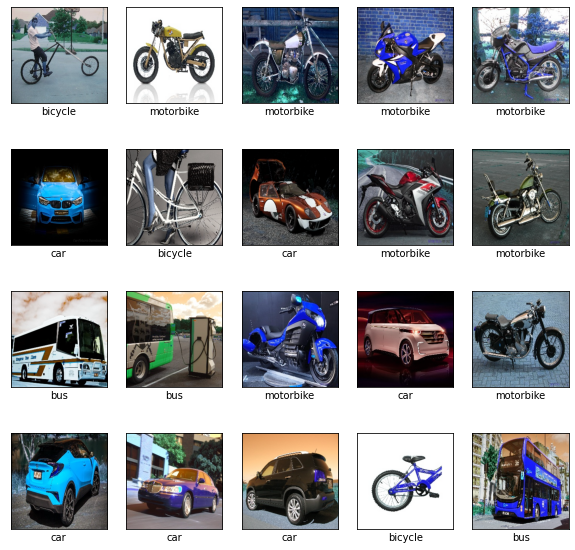

In [3]:
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i], cmap = plt.cm.binary)
    plt.xlabel(class_name[label[i]])

In [4]:
def cvt_hsv(X):
    m = X.shape[0]
    X_hsv = np.zeros((m, 256, 256, 3), dtype = np.uint8)
    for i in range(m):
        X_hsv[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2HSV)
    return X_hsv

def reshape_and_histogram(X):
    m, h, w = X.shape[:3]
    X_histogram = np.zeros((m, 3, 256))
    X_reshape = X.reshape((m, h*w, -1))
    X_reshape = np.transpose(X_reshape, (0, 2, 1))
    X_reshape = X_reshape.astype('uint8')
    for i in range(m):
        for j in range(3):
            (X_hist, _) = np.histogram(X_reshape[i,j], bins = np.arange(257))
            X_histogram[i,j] = X_hist
    return X_histogram

def flatten(X):
    m = X.shape[0]
    X_flatten = X.reshape((m,-1))
    return X_flatten
    

def normalize(X):
    norm = StandardScaler()
    X_norm = norm.fit_transform(X)
    return X_norm

def histogram(X, mode = 'bgr'):
    if mode == 'hsv':
        X = cvt_hsv(X)
    X_reshape = reshape_and_histogram(X)
    X_flatten = flatten(X_reshape)
    print('X_flatten.shape: ', X_flatten.shape)
    X_norm = normalize(X_flatten)
    return X_norm

def calculate_metrics(label, label_predict):
    #caculate accuracy and F1-score
    acc_score = accuracy_score(label, label_predict)
    fscore = f1_score(label, label_predict, average = 'weighted')
    return (acc_score, fscore)

def display_metrics(label, label_predict):
    scores = calculate_metrics(label, label_predict)
    print("Model Accuracy : {}".format(scores[0]))
    print("Model F1-Score  : {}".format(scores[1]))
    
def display_scores(scores):
    print("Scores            : {}".format(scores))
    print("Mean              : {}".format(scores.mean()))
    
def svm(X, y, C = 10, gamma = 'scale', cv = 3, scoring = 'accuracy'):
    svm = SVC(C = C, gamma = gamma)
    svm_score = cross_val_score(svm, X,y, cv= cv, scoring = scoring)
    display_scores(svm_score)
    y_pred = cross_val_predict(svm, X, y, cv = 3)
    display_metrics(y, y_pred) 
    return y_pred, svm

In [5]:
x = np.arange(6).reshape((3,2))
x_n = normalize(x)
print(x_n)

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


# Step 1: Tiến hành phân loại hình ảnh bằng cách sử dụng histogram của ảnh gốc

In [6]:
X_hist_bgr = histogram(data)
print(data.shape)
print(X_hist_bgr.shape)

X_flatten.shape:  (897, 768)
(897, 256, 256, 3)
(897, 768)


In [7]:
svm(X_hist_bgr, label)

Scores            : [0.51       0.48160535 0.44966443]
Mean              : 0.48042326023359
Model Accuracy : 0.48049052396878483
Model F1-Score  : 0.47966244071066066


(array([3, 3, 0, 3, 3, 2, 1, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 0, 0, 0, 2,
        3, 0, 2, 0, 3, 0, 1, 1, 2, 0, 1, 2, 0, 3, 3, 2, 2, 2, 0, 2, 2, 0,
        3, 1, 3, 0, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 2, 0, 2, 2, 2, 3, 3, 3,
        2, 3, 3, 3, 3, 2, 0, 3, 0, 0, 0, 3, 0, 2, 2, 1, 3, 0, 3, 0, 2, 2,
        2, 3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 3, 2, 0, 0, 2, 0, 0, 2, 1, 3,
        2, 3, 0, 2, 1, 0, 1, 0, 2, 3, 3, 2, 2, 3, 2, 0, 3, 2, 3, 3, 1, 1,
        3, 1, 0, 0, 2, 0, 2, 2, 3, 0, 2, 2, 2, 3, 3, 0, 1, 3, 3, 0, 0, 0,
        2, 3, 0, 0, 2, 2, 0, 2, 0, 2, 3, 1, 2, 3, 2, 1, 0, 3, 3, 1, 2, 0,
        2, 3, 0, 3, 3, 2, 1, 3, 0, 3, 0, 2, 0, 3, 3, 3, 3, 2, 3, 2, 2, 3,
        2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 3, 0, 2, 3, 2, 0, 0, 0, 2, 3, 0,
        2, 0, 2, 0, 2, 0, 0, 1, 0, 3, 1, 0, 2, 2, 2, 0, 2, 3, 1, 2, 2, 3,
        1, 2, 2, 1, 1, 2, 0, 0, 3, 2, 2, 3, 1, 0, 3, 2, 1, 0, 3, 0, 2, 0,
        0, 0, 0, 2, 3, 2, 0, 2, 1, 2, 0, 3, 0, 3, 0, 0, 2, 0, 2, 1, 2, 3,
        0, 2, 2, 2, 2, 3, 2, 2, 3, 0, 

In [8]:
X_hist_hsv = histogram(data,'hsv')
print(data.shape)
print(X_hist_hsv.shape)

X_flatten.shape:  (897, 768)
(897, 256, 256, 3)
(897, 768)


In [9]:
svm(X_hist_hsv, label, C= 10)

Scores            : [0.54666667 0.55852843 0.5       ]
Mean              : 0.5350650315867708
Model Accuracy : 0.5351170568561873
Model F1-Score  : 0.5323375185326603


(array([0, 3, 2, 3, 3, 2, 1, 2, 2, 3, 0, 2, 2, 0, 3, 2, 3, 1, 0, 1, 0, 3,
        2, 0, 2, 0, 2, 0, 3, 2, 2, 0, 0, 2, 0, 0, 3, 2, 1, 2, 2, 0, 2, 0,
        3, 3, 2, 0, 3, 2, 3, 0, 3, 0, 3, 2, 1, 3, 2, 0, 2, 2, 1, 3, 3, 1,
        2, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 1, 0, 1, 3, 2, 0, 0, 3, 0, 0, 3,
        3, 2, 2, 0, 0, 1, 0, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 3, 0, 2, 1, 3,
        0, 3, 0, 2, 1, 0, 3, 2, 3, 2, 3, 2, 0, 0, 2, 0, 1, 2, 3, 3, 1, 1,
        3, 1, 0, 0, 0, 0, 1, 2, 3, 0, 2, 3, 1, 1, 3, 0, 2, 3, 3, 3, 0, 0,
        2, 3, 0, 0, 2, 1, 2, 2, 0, 1, 3, 0, 2, 3, 2, 1, 0, 3, 3, 1, 2, 3,
        0, 3, 2, 3, 3, 2, 2, 3, 0, 3, 0, 2, 0, 3, 3, 3, 3, 1, 2, 0, 2, 2,
        3, 2, 3, 1, 0, 2, 1, 0, 1, 1, 3, 3, 2, 0, 3, 2, 0, 0, 2, 0, 0, 3,
        2, 2, 1, 1, 2, 0, 0, 3, 1, 3, 3, 0, 0, 3, 3, 0, 0, 3, 2, 2, 2, 1,
        3, 2, 1, 0, 2, 1, 2, 2, 3, 2, 2, 3, 1, 0, 3, 2, 2, 0, 3, 0, 0, 2,
        0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 3, 3, 2, 3, 0, 2, 3, 0, 2, 0, 1, 3,
        0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 

## Step 2: Sử dụng các giá trị color moment làm vector feature

In [10]:
def cacul_moment_color(X_hsv):
    m = X_hsv.shape[0]
    moment_color = np.zeros((m, 9), dtype = np.float32)
    moment_matrix = np.transpose(X_hsv, (0, 3, 1,2))
    moment_matrix = moment_matrix.reshape(m, 3, 256*256)
    mean = np.mean(moment_matrix,axis = -1)
    mean = mean.reshape(m, 3, 1)
    variance = np.power(moment_matrix - mean, 2)
    do_lech_chuan = np.sqrt(np.mean(variance, axis = -1))
    skewness = moment_matrix - mean
    skewness = np.power(skewness, 3)
    skewness = np.mean(skewness, axis = -1)
    skewness = np.cbrt(skewness)
    moment_color[:, :3] = mean.reshape(m, 3)
    moment_color[:, 3:6] = do_lech_chuan.reshape(m, 3)
    moment_color[:, 6:] = skewness.reshape(m, 3)
    return moment_color

#chia tap du lieu lam 4 phan
m = data.shape[0]
index = int(m/4)
train_X_moment_color1 = cacul_moment_color(data[: index])
train_X_moment_color2 = cacul_moment_color(data[index: 2*index])
train_X_moment_color3 = cacul_moment_color(data[index * 2: 3*index])
train_X_moment_color4 = cacul_moment_color(data[index * 3: ])
train_X_moment_color = np.concatenate((train_X_moment_color1, train_X_moment_color2,
                                      train_X_moment_color3, train_X_moment_color4), axis = 0)
print(train_X_moment_color.shape)

(897, 9)


In [11]:
svm(train_X_moment_color, label, C=10)

Scores            : [0.51666667 0.51170569 0.47986577]
Mean              : 0.5027460413658255
Model Accuracy : 0.5027870680044593
Model F1-Score  : 0.4982084508229145


(array([0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 3,
        2, 3, 2, 3, 2, 3, 3, 1, 2, 0, 0, 3, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0,
        3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 0, 2, 1, 0, 2, 3, 2, 3, 2, 0, 2, 2,
        1, 3, 3, 3, 3, 2, 3, 3, 0, 0, 0, 2, 3, 2, 2, 1, 2, 3, 3, 0, 1, 1,
        2, 3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 3, 3, 2, 0, 0, 2, 1, 3,
        2, 0, 3, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 0, 3, 2, 1,
        2, 3, 0, 0, 1, 0, 3, 2, 3, 0, 2, 1, 3, 2, 0, 0, 1, 3, 3, 2, 0, 0,
        2, 2, 0, 3, 0, 2, 2, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 3, 2, 1, 2, 3,
        1, 0, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 0, 1, 2, 3, 2, 3, 1,
        3, 2, 3, 0, 2, 1, 2, 3, 0, 1, 3, 3, 2, 2, 3, 2, 0, 3, 0, 0, 0, 0,
        2, 2, 1, 0, 3, 3, 0, 2, 3, 3, 2, 2, 0, 2, 3, 0, 3, 0, 3, 3, 2, 3,
        2, 2, 3, 1, 1, 3, 1, 0, 2, 2, 2, 3, 1, 1, 3, 3, 3, 0, 2, 0, 2, 2,
        0, 0, 3, 3, 3, 0, 0, 2, 2, 3, 2, 1, 1, 3, 0, 2, 3, 3, 2, 3, 1, 1,
        0, 2, 2, 3, 2, 3, 2, 3, 3, 3, 

# Step 3: Sử dụng đặc trưng LBP làm vector đặc trưng

In [29]:
def lbp(X, P = 8, R = 1):
    m = X.shape[0]
    #p = 134       ##12:134, 16:242
    p=58
    hist_X = np.zeros((m, (p+1) * 4))
    for i in range(m):
        im = X[i]
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        eps = 1e-8
        lbp1 = local_binary_pattern(gray[:128, :128], P = P, R = R, method='nri_uniform')
        (hist1, _) = np.histogram(lbp1.ravel(),bins=np.arange(0, p+2),range=(0, p+1))
        lbp2 = local_binary_pattern(gray[128:256, :128], P = P, R = R, method='nri_uniform')
        (hist2, _) = np.histogram(lbp2.ravel(),bins=np.arange(0, p+2),range=(0, p+1))
        lbp3 = local_binary_pattern(gray[:128, 128:256], P = P, R = R, method='nri_uniform')
        (hist3, _) = np.histogram(lbp3.ravel(),bins=np.arange(0, p+2),range=(0, p+1))
        lbp4 = local_binary_pattern(gray[128:256, 128:256], P = P, R = R, method='nri_uniform')
        (hist4, _) = np.histogram(lbp4.ravel(),bins=np.arange(0, p+2),range=(0, p+1))
        # normalize the histogram
        hist = np.concatenate((hist1, hist2,hist3, hist4), axis = 0).astype(np.float64)
        hist /= (hist.sum() + eps)
        hist_X[i] = hist
    return hist_X

In [30]:
X_lbp = lbp(data)
print(X_lbp.shape)

(897, 236)


In [31]:
print(X_lbp.shape)
svm(X_lbp, label, C=100)

(897, 236)
Scores            : [0.69666667 0.69565217 0.69127517]
Mean              : 0.6945313361216483
Model Accuracy : 0.6945373467112598
Model F1-Score  : 0.6946869164123842


(array([1, 3, 3, 3, 3, 2, 3, 1, 3, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 1, 0, 3,
        1, 3, 1, 3, 1, 0, 1, 1, 2, 0, 3, 2, 3, 2, 2, 3, 0, 1, 2, 0, 0, 1,
        3, 2, 3, 0, 0, 1, 3, 0, 3, 2, 3, 2, 0, 3, 2, 0, 2, 2, 2, 0, 2, 2,
        1, 3, 3, 3, 3, 2, 2, 3, 0, 0, 0, 0, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0,
        2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 1, 0, 2, 0, 1, 2, 1, 3,
        2, 3, 3, 0, 3, 0, 0, 1, 0, 3, 3, 2, 2, 0, 1, 3, 1, 2, 0, 3, 2, 1,
        2, 1, 2, 3, 0, 2, 3, 1, 0, 0, 3, 1, 1, 1, 0, 0, 2, 1, 3, 3, 0, 0,
        3, 2, 0, 2, 0, 1, 1, 2, 3, 3, 3, 2, 1, 0, 1, 0, 3, 3, 3, 1, 1, 3,
        1, 0, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 0, 0, 0, 3, 3, 2, 3, 3, 1, 1,
        3, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 3, 2, 1, 3, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 1, 3, 2, 0, 0, 2, 2, 3, 1, 0, 2, 2, 0, 3, 0, 3, 0, 1, 1, 1,
        2, 2, 0, 0, 2, 2, 0, 0, 3, 2, 2, 1, 1, 1, 3, 2, 2, 0, 3, 0, 2, 0,
        3, 3, 2, 2, 0, 0, 3, 1, 0, 0, 3, 3, 0, 2, 0, 0, 3, 3, 3, 3, 3, 2,
        0, 1, 2, 2, 2, 3, 2, 3, 0, 2, 

# Step 4: Sử dụng đặc trưng HOG của ảnh làm feature đầu vào cho bộ huấn luyện SVM

In [32]:
def hog_feature(X):
    X_hog = []
    im_hog = []
    m = X.shape[0]
    for i in range(m):
        fd, im = hog(X[i], orientations=12, pixels_per_cell=(64, 64), 
                 cells_per_block=(2,2), visualize=True, multichannel=True, block_norm='L2')
        X_hog.append(fd)
        im_hog.append(im)
    return np.asarray(X_hog), np.asarray(im_hog)    
    

In [33]:
X_hog, im_hog = hog_feature(data)


In [34]:
print(X_hog.shape)
svm(X_hog, label, C=5)

(897, 432)
Scores            : [0.78       0.82608696 0.84563758]
Mean              : 0.8172415134714521
Model Accuracy : 0.8171683389074693
Model F1-Score  : 0.8162910553533224


(array([0, 3, 3, 3, 3, 2, 0, 2, 3, 3, 1, 1, 3, 2, 3, 2, 1, 2, 2, 1, 0, 3,
        1, 3, 2, 3, 1, 3, 1, 1, 2, 0, 0, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0,
        3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 1, 0, 1, 0, 1, 2, 2, 3, 2, 1,
        1, 3, 3, 3, 3, 3, 2, 3, 0, 2, 0, 0, 2, 1, 2, 3, 0, 3, 3, 0, 3, 0,
        0, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 3, 3, 1, 0, 0, 0, 1, 2, 1, 3,
        2, 3, 3, 2, 3, 3, 0, 1, 0, 3, 3, 2, 2, 0, 0, 3, 1, 2, 0, 3, 1, 1,
        1, 1, 2, 3, 0, 0, 3, 1, 3, 0, 3, 1, 2, 1, 0, 3, 2, 1, 3, 3, 1, 0,
        0, 2, 0, 0, 3, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 0, 0, 3, 3, 1, 2, 3,
        2, 3, 1, 3, 3, 2, 2, 0, 3, 3, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 3, 2,
        0, 0, 2, 1, 2, 2, 1, 2, 0, 1, 1, 3, 1, 2, 3, 2, 0, 0, 2, 1, 0, 0,
        0, 3, 1, 3, 2, 3, 2, 2, 1, 3, 1, 3, 2, 2, 3, 3, 0, 3, 2, 3, 1, 1,
        2, 2, 0, 3, 2, 2, 0, 0, 3, 2, 2, 1, 1, 1, 3, 2, 2, 0, 3, 0, 3, 2,
        0, 0, 2, 2, 3, 3, 0, 2, 3, 0, 0, 3, 1, 3, 0, 2, 0, 3, 3, 0, 3, 2,
        0, 2, 2, 1, 2, 3, 2, 1, 2, 3, 

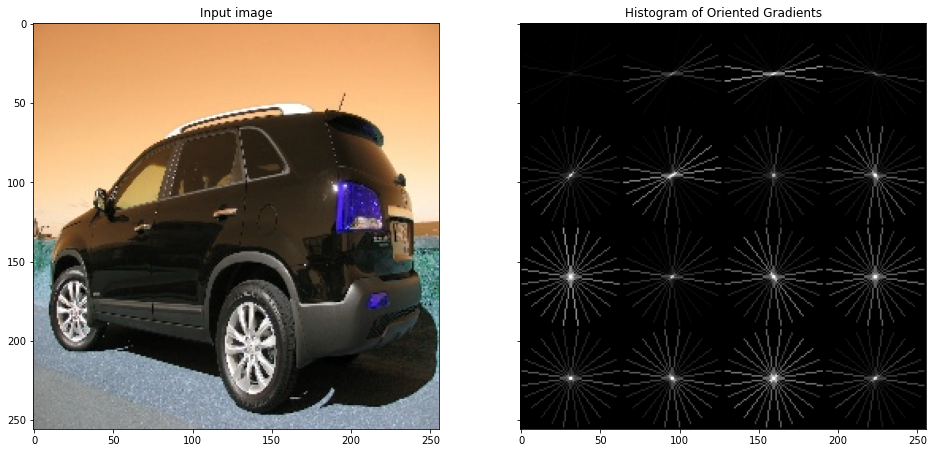

In [35]:
from skimage import exposure
i = 17
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(data[i], cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(im_hog[i], in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

# Step 5: Kết hợp 2 đặc trưng lbp và hog thành feature vector đâu vào của svm

In [36]:
X_lbp_norm = normalize(X_lbp)
X_hog_norm = normalize(X_hog)

X_total = np.concatenate((X_lbp_norm, X_hog_norm), axis = 1)
print(X_total.shape)

(897, 668)


In [40]:
label_pred_total, clf = svm(X_total, label, C=10)

Scores            : [0.85666667 0.86956522 0.83892617]
Mean              : 0.8550526861848718
Model Accuracy : 0.855072463768116
Model F1-Score  : 0.8546823023996949


car : car
bicycle : bicycle
car : car
motorbike : motorbike
motorbike : motorbike


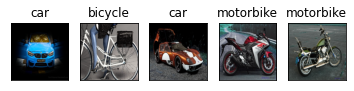

In [41]:
for i in range(5 , 10):
    plt.subplot(1,5,i-4)
    plt.imshow(data[i])
    plt.title(class_name[label[i]])
    plt.xticks([])
    plt.yticks([])
    print(class_name[label[i]], end=' : ')
    print(class_name[label_pred_total[i]])

In [42]:
#training all data and save in model
print(X_total.shape)
print(label.shape)
clf = SVC(C = 10, gamma= 'scale')
clf.fit(X_total,label)


(897, 668)
(897,)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
label_pred = clf.predict(X_total)
display_metrics(label, label_pred)

Model Accuracy : 1.0
Model F1-Score  : 1.0


In [44]:
import pickle
filename = 'clf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [45]:
load_model = pickle.load(open(filename, 'rb'))
label_pred = load_model.predict(X_total)
display_metrics(label,label_pred)

Model Accuracy : 1.0
Model F1-Score  : 1.0


bicycle : bicycle
motorbike : motorbike
motorbike : motorbike
motorbike : motorbike
motorbike : motorbike


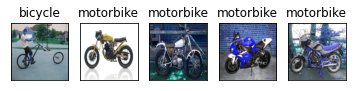

In [46]:
for i in range(0 , 5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[i])
    plt.title(class_name[label[i]])
    plt.xticks([])
    plt.yticks([])
    print(class_name[label[i]], end=' : ')
    print(class_name[label_pred[i]])

In [27]:
test_path = './test_img/bus1.jpg'
#test_file = glob.glob(test_path)
im = cv2.imread(test_path)

    

In [28]:
# img = cv2.imread(test_path, cv2.IMREAD_COLOR)
# img = cv2.resize(img, (256,256))
# img = np.expand_dims(img, axis = 0)
# X_lbp1 = lbp(img, P=12, R =2, method = 'nri_uniform')
# #print(X_lbp1[0, :50])
# X_hog1,_ = hog_feature(img)
# #print(X_hog1)
# X_lbp_norm1 = normalize(X_lbp1.T).T
# #print(X_lbp_norm1)
# X_hog_norm1 = normalize(X_hog1.T).T
# X_total1 = np.concatenate((X_lbp_norm1, X_hog_norm1), axis = 1)
# #print(X_total1[0,:])
# print(X_total1.shape)
# # Preprocessing the image
# #x = image.img_to_array(img)
# # x = np.true_divide(x, 255)
# #x = np.expand_dims(x, axis=0)

# # Be careful how your trained model deals with the input
# # otherwise, it won't make correct prediction!
# #x = preprocess_input(x, mode='caffe')
# model = pickle.load(open('clf2.sav', 'rb'))
# preds = model.predict(X_total1)
# print('pred.shape: ', preds.shape)
# print(class_name[preds[0]])